# Altair

### Handy hints 

* Some of the plotting libraries we use need to communicate a lot of data to the browser. Depending on which version of Jupyter you are running, you may need to launch this notebook with a higher data rate limit: `jupyter notebook --NotebookApp.iopub_data_rate_limit=10000000`

* In general, we are using plotting libraries that return objects encapsulating the plot. You can check the type of these returned objects with `type()`. Jupyter's tools for exploring objects and methods will also be useful: the `?` and `??` operators, and tab autocompletion.

## Setup 

In [1]:
import pandas as pd
import numpy as np

In [2]:
# We may want to use some colours etc from other libraries
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# import and initialise altair
# the second line is needed in jupyter notebook, but not jupyter-lab
import altair as alt
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

### Data 

In [4]:
iris = sns.load_dataset('iris')

In [5]:
sales = pd.read_csv("housing-data-10000.csv", 
                    usecols=['id','date','price','zipcode','lat','long',
                             'waterfront','view','grade','sqft_living','sqft_lot'],
                    parse_dates=['date'], 
                    dtype={'zipcode': 'category',
                           'waterfront': 'bool'})

In [6]:
# We'll downsample to make plots a bit smaller to store
# By default, Altair complains if there are over 5000 rows
sales = sales.sample(2000)

In [7]:
sales.head()

id       date     price  sqft_living  sqft_lot  waterfront  \
6616   104530240 2014-08-27  225000.0         1320      5665       False   
6866  7852110380 2014-07-03  605000.0         2610      6405       False   
9771  1328330780 2015-04-15  329950.0         1000      9170       False   
8576  2826049091 2014-09-29  259950.0          790      8100       False   
8247   126059225 2014-08-06  525000.0         2300     43560       False   

      view  grade zipcode      lat     long  
6616     0      7   98023  47.3096 -122.357  
6866     0      8   98065  47.5373 -121.874  
9771     0      7   98058  47.4405 -122.134  
8576     0      6   98125  47.7159 -122.305  
8247     0      7   98077  47.7716 -122.101

In [8]:
sales.dtypes

id                      int64
date           datetime64[ns]
price                 float64
sqft_living             int64
sqft_lot                int64
waterfront               bool
view                    int64
grade                   int64
zipcode              category
lat                   float64
long                  float64
dtype: object

## Altair 

[Altair](https://altair-viz.github.io) is a library for creating interactive plots. 

Altair is built around the [Vega-Lite](https://vega.github.io/vega-lite/) schema, a "visualisation grammar". Altair plots are specified in Python, then converted behind the scenes to a declarative JSON structure that follows the Vega-Lite schema, which can then be rendered by a Javascript library.

Altair works very well with Pandas - in fact, it usually expects data to be in a Pandas DataFrame.

### Simple interactive plotting

Here's a simple example of an Altair plot.

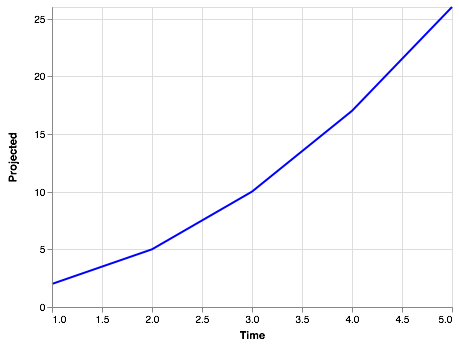

In [9]:
df = pd.DataFrame({
    'Time': [1,2,3,4,5],
    'Projected': [2,5,10,17,26],
    'Actual': [1,4,9,11,9]
})

chart = alt.Chart(df)

chart.mark_line(color='blue').encode(x='Time', y='Projected')

Here `mark_line()` tells Altair we want to draw a line, and `encode()` is used to assign our variables (columns of the DataFrame) to possible encoding channels of the line. We've just used `x` and `y`. Notice that we set the colour in `mark_line()`; if we'd wanted to set the colour to encode some variable, we would have set it in `encode()`.

Simple pan-and-zoom interactivity can be added with `.interactive()`:

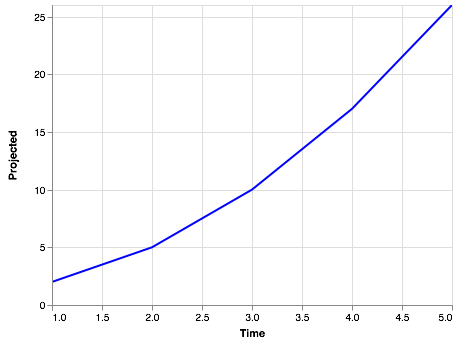

In [10]:
chart = alt.Chart(df)

chart.mark_line(color='blue').encode(x='Time', y='Projected').interactive()

If we wanted to produce the chart we produced earlier, with scatter points, we can use `alt.layer()`, which takes the components as arguments, or just the `+` operator: 

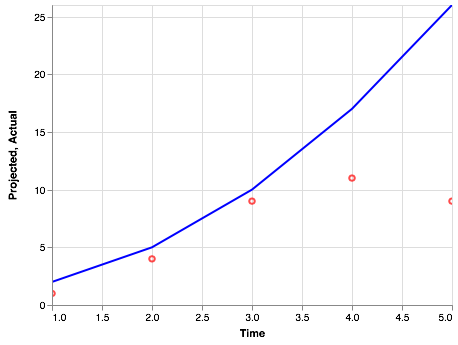

In [11]:
df = pd.DataFrame({
    'Time': [1,2,3,4,5],
    'Projected': [2,5,10,17,26],
    'Actual': [1,4,9,11,9],
})

chart = alt.Chart(df)
line = chart.mark_line(color='blue').encode(x='Time', y='Projected')
points = chart.mark_point(color='red').encode(x='Time',y='Actual')

# or alt.layer(line, points).interactive()
(line + points).interactive()

**Exercise:** Recreate, in Altair, the scatter plot of house sales with x-coordinates given by `longitude` and y-coordinates given by `latitude`. You can use `.mark_point()` or `.mark_circle()`. One issue you will discover, if you use the `x` and `y` encodings, is that Altair and Vega-lite include the axis zero by default. 

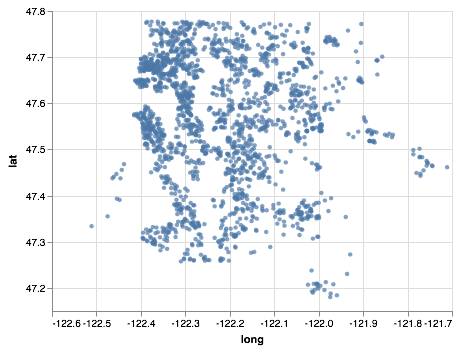

In [59]:
# Solution
alt.Chart(data=sales)\
    .mark_circle(size=20)\
    .encode(alt.X('long', scale=alt.Scale(zero=False)),
            alt.Y('lat', scale=alt.Scale(zero=False)))

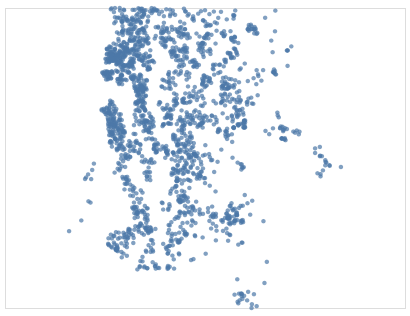

In [62]:
# Solution
alt.Chart(data=sales)\
    .mark_circle(size=20)\
    .encode(longitude='long', latitude='lat')

## Data types 

Altair recognises four fundamental [data types](https://altair-viz.github.io/user_guide/encoding.html#encoding-data-types):

| Data Type | Shorthand Code | Description |
|-|-|-|
| quantitative | Q | a continuous real-valued quantity |
| ordinal | O | a discrete ordered quantity |
| nominal | N | a discrete unordered category |
| temporal | T | a time or date value |

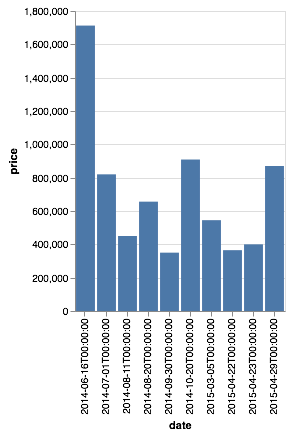

In [31]:
alt.Chart(sales.sample(10))\
    .mark_bar()\
    .encode(x='date:N', y='price:Q')

**Exercise:** 

* Colour your "geographical" scatter plot of house sales according to whether the property is or is not a waterfront property. What is the appropriate data type?
* Colour according to price. What is the appropriate data type?
* Colour according to view. What is the appropriate data type?

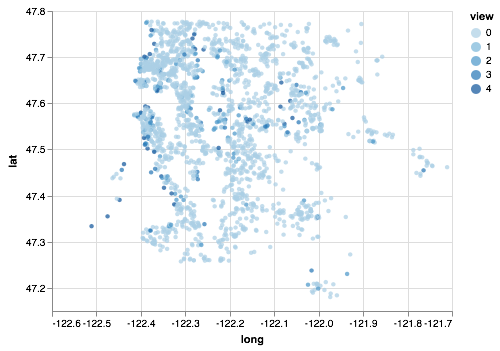

In [69]:
# Solution
alt.Chart(data=sales)\
    .mark_circle(size=20)\
    .encode(alt.X('long', scale=alt.Scale(zero=False)),
            alt.Y('lat', scale=alt.Scale(zero=False)),
            color='view:O')

## Marks and encodings 

Altair has various marks used to draw different kinds of plots. For instance:

* `mark_point()` : points on a scatter plot
* `mark_bar()` : rectangular bars, in e.g. a bar plot or histogram
* `mark_area()` : filled/shaded areas

The full list of marks can be found at [https://altair-viz.github.io/user_guide/marks.html](https://altair-viz.github.io/user_guide/marks.html).

We can assign variables of the DataFrame to different encoding channels. For instance:

* `x` and `y` : position of mark (scatterpoint position, top of bar-chart bar, etc)
* `color` : colour of the mark (colour of point, bar, shaded area etc)
* `size` : size of the mark (point size, bar width, etc)

You can find a list of encodings at [https://altair-viz.github.io/user_guide/encoding.html](https://altair-viz.github.io/user_guide/encoding.html).

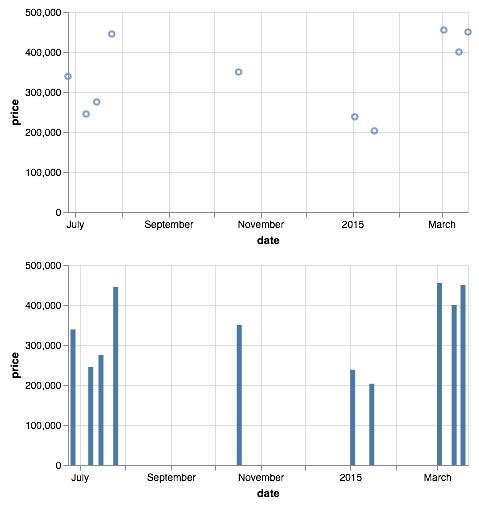

In [33]:
# Demo: marks
base = alt.Chart(sales.sample(10)).encode(x='date:T', y='price:Q') 

(base.mark_point() & base.mark_bar()).configure_view(height=200)

## Aggregations 

Many common plot types involve summarising the data:

* histograms involve putting some continuous variable into bins (_binning_), and then _counting_ how many samples are in each bin
* bar charts or point plots usually involve plotting the _mean_ of some variable, and possibly error bars based on _confidence intervals_
* box plots usually involve finding the _mean_, _quartiles_, _min_ and _max_ of some variable

Combining aggregation functions with different kind of marks is very powerful. 

Most aggregations have a shorthand string form (e.g. encode `y='count()'`) and a longer form (e.g encode `y=alt.Y(aggregate='count', type='quantitative')`).

Binning is done using an explicit axis object like `alt.X()` or `alt.Y()`, with `bin=True` or `bin=alt.Bin()`.

You can find a list of aggregation functions at [https://altair-viz.github.io/user_guide/encoding.html#binning-and-aggregation](https://altair-viz.github.io/user_guide/encoding.html#binning-and-aggregation)

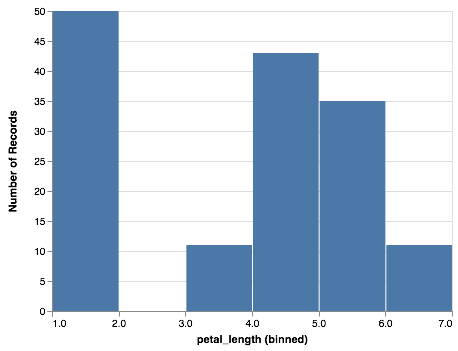

In [45]:
# Histogram of iris petal lengths

alt.Chart(iris)\
    .mark_bar()\
    .encode(x=alt.X('petal_length',bin=True),
            y='count()')

**Exercise:**

* Using `mark_bar()`, create a histogram of house prices from the `sales` data.
* Try the same plot but using `.mark_area()`.
* Think: what would you do if asked to create a histogram of the log of house prices?

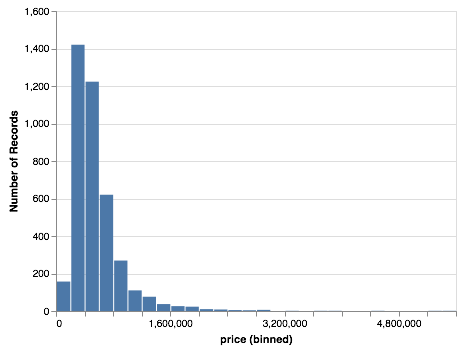

In [46]:
# Solution
hist = alt.Chart(sales)\
                .mark_bar()\
                .encode(
                    alt.X("price:Q", bin=alt.Bin(maxbins=30)),
                    y='count()',
                )
hist

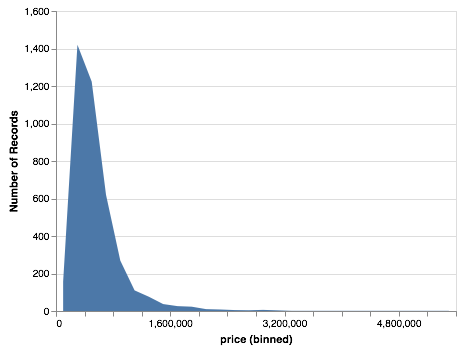

In [47]:
# Solution
hist = alt.Chart(sales)\
                .mark_area()\
                .encode(
                    alt.X("price:Q", bin=alt.Bin(maxbins=30)),
                    y='count()',
                )
hist

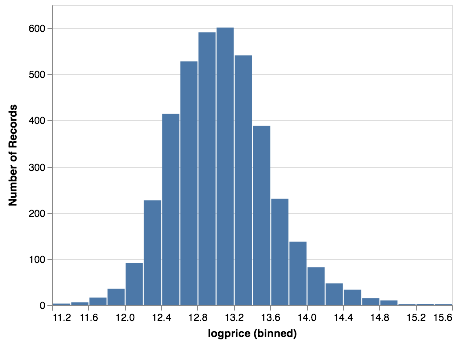

In [52]:
# Solution
hist = alt.Chart(sales)\
                .mark_bar()\
                .encode(
                    alt.X("logprice:Q", bin=alt.Bin(maxbins=30)),
                    y='count()',
                ).transform_calculate(
                    logprice='log(datum.price)')
                
hist

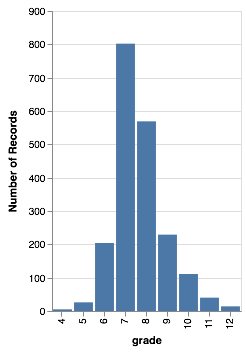

In [71]:
# More examples
hist = alt.Chart(sales)\
                .mark_bar()\
                .encode(
                    x='grade:O',
                    y='count()',
                )
hist

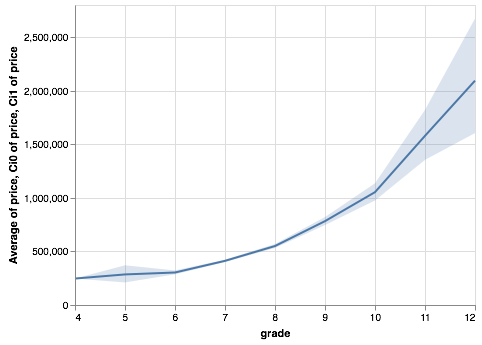

In [68]:
# More examples
base = alt.Chart(sales)

line = base.mark_line()\
           .encode(x='grade',
                   y='average(price):Q')

confidence_interval = base.mark_area(opacity=0.2)\
                          .encode(x='grade',
                                  y='ci0(price)',
                                  y2='ci1(price)')

line + confidence_interval

## Interactivity 

Hover text can be added to a plot simply by setting the `tooltip` encoding.

**Exercise:** On your scatter plot of house location, set the hover info to display the sale price.

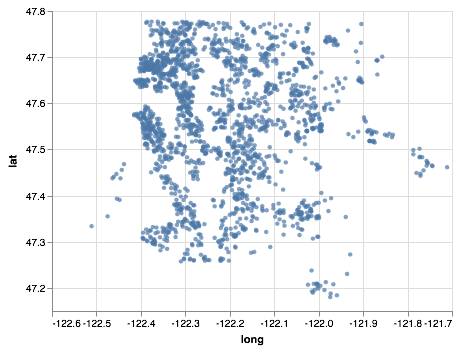

In [73]:
# Solution
alt.Chart(data=sales)\
    .mark_circle(size=20)\
    .encode(alt.X('long', scale=alt.Scale(zero=False)),
            alt.Y('lat', scale=alt.Scale(zero=False)),
            tooltip='price'
            )

Basic pan-and-zoom interactivity is set with `.interactive()`. This is actually short for:

```
chart.add_selection(
    alt.selection_interval(bind='scales')
)
```

This means we've added a behaviour where dragging the mouse (selecting an interval) causes the plot to zoom and pan (bind='scales'). We can create custom interactive behaviour with [bindings, selections, and conditions](https://altair-viz.github.io/user_guide/interactions.html).


We can define particular kinds of selections with Altair functions:

* `selection_interval()` allows us to select everything in a region of the plot by dragging over it
* `selection_single()` allows us to select a single element by clicking on it
* `selection_multi()` allows us to select multiple elements by holding shift and clicking

`add_selection()` is used to the defined selection object to a plot.

`alt.condition()` is used to change plot encodings conditional on whether an element is currently selected or not. This is what makes the plots interactive.

**Exercise:**

You're given plot where we've added a selection that changes the colour of the points in `area_price_chart` when selected. Edit the `location_chart` so that when points are selected in `area_price_chart`, they are _also_ highlighted in `location_chart`.

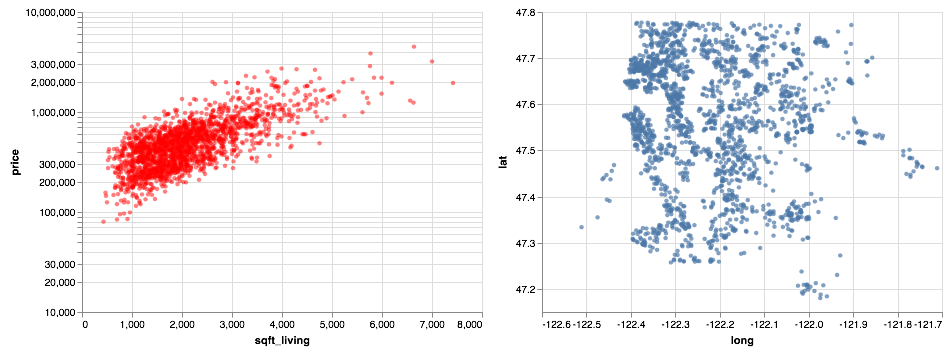

In [72]:
selected_houses = alt.selection_interval()

area_price_chart = alt.Chart(data=sales).mark_circle(size=20, opacity=0.5)\
                               .encode(x='sqft_living:Q',
                                       y=alt.Y('price:Q', scale=alt.Scale(type='log')),
                                       color=alt.condition(selected_houses,
                                                           alt.value('red'),
                                                           alt.value('lightgrey')))\
                               .add_selection(selected_houses)

location_chart = alt.Chart(data=sales).mark_circle(size=20)\
                             .encode(alt.X('long', scale=alt.Scale(zero=False)),
                                     alt.Y('lat', scale=alt.Scale(zero=False))
                                     )

area_price_chart | location_chart